# **Case Study: Cyclistic**

How Does a Bike-Share Navigate Speedy Success?

## **Introduction**

This cyclistic bike-sharing analysis project is under the course of Google Professional Certification.

**Scenario**

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

**About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

This analysis includes 12 months of bike-sharing data (Jan 2021 to Dec 2021). The data has been made available by
Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).

*Questions should be answered*

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?


In [1]:
#This is in Python 3 environment
#Import libraries
import pandas as pd
import numpy as np

**Collect and Wrangle Data**

In [2]:
#Collect data and combine them into one file
dvt = pd.concat(map(pd.read_csv, ['../input/google-da-capstone-project/202101-divvy-tripdata.csv', '../input/google-da-capstone-project/202102-divvy-tripdata.csv', '../input/google-da-capstone-project/202103-divvy-tripdata.csv',
                                           '../input/google-da-capstone-project/202104-divvy-tripdata.csv', '../input/google-da-capstone-project/202105-divvy-tripdata.csv','../input/google-da-capstone-project/202106-divvy-tripdata.csv', '../input/google-da-capstone-project/202107-divvy-tripdata.csv',
                                           '../input/google-da-capstone-project/202108-divvy-tripdata.csv', '../input/google-da-capstone-project/202109-divvy-tripdata.csv',
                                           '../input/google-da-capstone-project/202110-divvy-tripdata.csv', '../input/google-da-capstone-project/202111-divvy-tripdata.csv', 
                                           '../input/google-da-capstone-project/202112-divvy-tripdata.csv']), ignore_index = False)
print(dvt)

                 ride_id  rideable_type           started_at  \
0       E19E6F1B8D4C42ED  electric_bike  2021-01-23 16:14:19   
1       DC88F20C2C55F27F  electric_bike  2021-01-27 18:43:08   
2       EC45C94683FE3F27  electric_bike  2021-01-21 22:35:54   
3       4FA453A75AE377DB  electric_bike  2021-01-07 13:31:13   
4       BE5E8EB4E7263A0B  electric_bike  2021-01-23 02:24:02   
...                  ...            ...                  ...   
247535  847431F3D5353AB7  electric_bike  2021-12-12 13:36:55   
247536  CF407BBC3B9FAD63  electric_bike  2021-12-06 19:37:50   
247537  60BB69EBF5440E92  electric_bike  2021-12-02 08:57:04   
247538  C414F654A28635B8  electric_bike  2021-12-13 09:00:26   
247539  37AC57E34B2E7E97   classic_bike  2021-12-13 08:45:32   

                   ended_at           start_station_name start_station_id  \
0       2021-01-23 16:24:44   California Ave & Cortez St            17660   
1       2021-01-27 18:47:12   California Ave & Cortez St            17660   


In [3]:
#Look up the first five rows of dataframe
dvt.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [4]:
#Drop columns you don't need to
to_drop = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']
dvt.drop(to_drop, axis=1, inplace=True)
dvt.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.90,-87.70,casual


**Clean data**

In [5]:
#Check and drop duplicates
dvt.duplicated()
dvt.drop_duplicates()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,41.860000,-87.720000,41.850000,-87.710000,member


In [6]:
#Drop null
dvt.isnull()
dvt.dropna()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,41.860000,-87.720000,41.850000,-87.710000,member


In [7]:
#Look up data types for each column
dvt.dtypes

ride_id           object
rideable_type     object
started_at        object
ended_at          object
start_lat        float64
start_lng        float64
end_lat          float64
end_lng          float64
member_casual     object
dtype: object

In [8]:
#Bike types
dvt['rideable_type'].value_counts()

classic_bike     3251028
electric_bike    2031692
docked_bike       312343
Name: rideable_type, dtype: int64

In [9]:
#Member types
dvt['member_casual'].value_counts()

member    3066058
casual    2529005
Name: member_casual, dtype: int64

In [10]:
#Change data types in datetime
dvt['started_at'] = pd.to_datetime(dvt['started_at'] )
dvt['ended_at'] = pd.to_datetime(dvt['ended_at'] )

In [11]:
#Calculate time duriation and change them in seconds
dvt['time_diff(s)'] = dvt['ended_at'] - dvt['started_at']
dvt['time_diff(s)'] = dvt['time_diff(s)'] / np.timedelta64(1, "s")

In [12]:
#Calculate ride distances
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

dvt["ride_distance(km)"] = haversine_np(dvt.start_lng, dvt.start_lat, dvt.end_lng, dvt.end_lat)

In [13]:
#Add one column of day of the week
dvt['weekday'] = dvt['started_at'].dt.dayofweek

In [14]:
#Show statistical summary
dvt.describe()

,start_lat,start_lng,end_lat,end_lng,time_diff(s),ride_distance(km),weekday
count,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06,5.595063e+06,5.590292e+06,5.595063e+06
mean,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01,1.316121e+03,2.185020e+00,3.182436e+00
std,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02,1.070009e+04,1.972848e+00,1.998339e+00
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,-3.482000e+03,0.000000e+00,0.000000e+00
25%,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01,4.050000e+02,8.995721e-01,1.000000e+00
50%,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01,7.200000e+02,1.636812e+00,3.000000e+00
75%,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01,1.307000e+03,2.880126e+00,5.000000e+00
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01,3.356649e+06,1.143118e+02,6.000000e+00


In [15]:
#Drop rows with unreasonable distances
dvt = dvt.loc[~((dvt['ride_distance(km)'] > 100))]
dvt = dvt.loc[~((dvt['ride_distance(km)'] < 0.5))]

In [16]:
#Drop rows with unreasonable ride duriation
dvt = dvt.loc[~((dvt['time_diff(s)'] > 18000))]
dvt = dvt.loc[~((dvt['time_diff(s)'] < 30))]

In [17]:
dvt.describe()

,start_lat,start_lng,end_lat,end_lng,time_diff(s),ride_distance(km),weekday
count,4.887580e+06,4.887580e+06,4.886099e+06,4.886099e+06,4.887580e+06,4.886099e+06,4.887580e+06
mean,4.190236e+01,-8.764658e+01,4.190266e+01,-8.764681e+01,1.056384e+03,2.475340e+00,3.178254e+00
std,4.450927e-02,2.790620e-02,4.463997e-02,2.810874e-02,1.154855e+03,1.936776e+00,1.990865e+00
min,4.164000e+01,-8.784000e+01,4.148000e+01,-8.807000e+01,3.000000e+01,5.000007e-01,0.000000e+00
25%,4.188223e+01,-8.766027e+01,4.188224e+01,-8.766098e+01,4.390000e+02,1.166891e+00,1.000000e+00
50%,4.190000e+01,-8.764312e+01,4.190022e+01,-8.764335e+01,7.310000e+02,1.877945e+00,3.000000e+00
75%,4.192949e+01,-8.762932e+01,4.192955e+01,-8.762932e+01,1.253000e+03,3.151088e+00,5.000000e+00
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01,1.800000e+04,3.219050e+01,6.000000e+00


In [18]:
#Summary of ride distances of members in each day of week
gm = dvt.groupby(['weekday', 'member_casual']).agg({'ride_distance(km)': ['mean', 'min', 'max']})

In [19]:
gm

ride_distance(km)                     
                                   mean       min        max
weekday member_casual                                       
0       casual                 2.558118  0.500027  29.019999
        member                 2.314225  0.500049  25.211602
1       casual                 2.545767  0.500041  30.058708
        member                 2.317545  0.500017  23.637336
2       casual                 2.545386  0.500030  31.886446
        member                 2.327257  0.500001  24.739052
3       casual                 2.534006  0.500040  29.807062
        member                 2.308775  0.500040  26.327777
4       casual                 2.563291  0.500005  32.190498
        member                 2.328078  0.500040  27.672977
5       casual                 2.699378  0.500054  30.167007
        member                 2.474187  0.500033  25.208384
6       casual                 2.740619  0.500101  30.989006
        member                 2.488729  0.500035  32.002739

In [20]:
#Summary of ride duriation of members in each day of week
gt = dvt.groupby(['weekday', 'member_casual']).agg({'time_diff(s)': ['mean', 'min', 'max']})
gt

time_diff(s)               
                              mean   min      max
weekday member_casual                            
0       casual         1367.092216  31.0  17974.0
        member          777.229439  30.0  17767.0
1       casual         1225.807469  30.0  17973.0
        member          760.367538  30.0  17990.0
2       casual         1194.307504  30.0  17987.0
        member          764.791838  31.0  17986.0
3       casual         1184.684658  31.0  17969.0
        member          759.624221  30.0  17921.0
4       casual         1290.426835  30.0  17990.0
        member          791.434567  30.0  18000.0
5       casual         1515.080487  30.0  17999.0
        member          900.257890  32.0  17982.0
6       casual         1576.688714  30.0  17996.0
        member          915.860634  30.0  17827.0

## **Visualization**

Here the [link](https://public.tableau.com/views/GoogleDAcycle/MembersizeandBiketypes?:language=en-US&:display_count=n&:origin=viz_share_link) of visualization made by Tableau.

In [21]:
from PIL import Image
from IPython.display import display

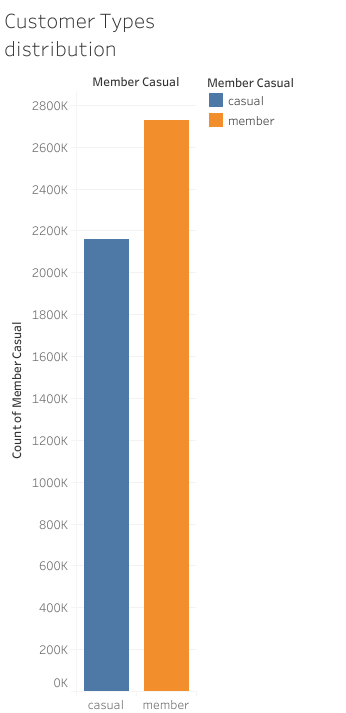

In [22]:
#Customer Types Distribution
image1 = Image.open('../input/cyclist-plots-made-by-tableau/Customer Types distribution.png')
display(image1)

Total mamber riders are 26% more than casual riders

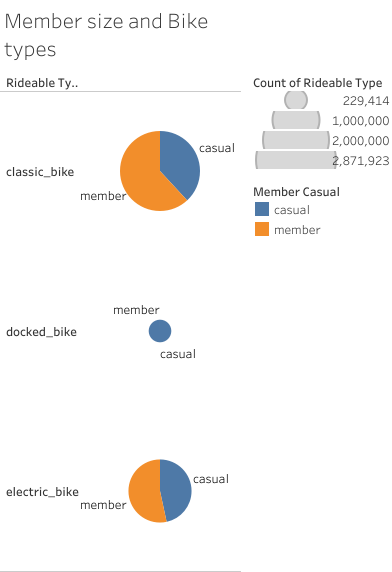

In [23]:
#Bike types with different member types
image2 = Image.open('../input/cyclist-plots-made-by-tableau/Member size and Bike types.png')
display(image2)

Both casual riders and member riders used classic bikes the most.

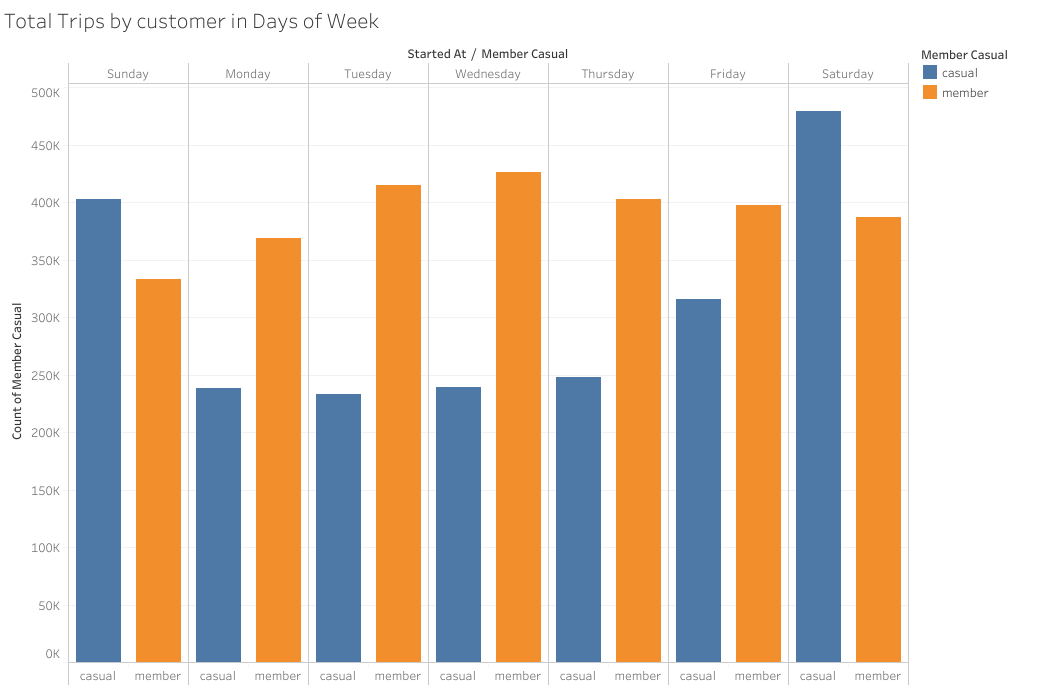

In [24]:
#Total Trips by customer in days of week
image3 = Image.open('../input/cyclist-plots-made-by-tableau/Total Trips by customer in Days of Week.png')
display(image3)

This graph shows casual riders are more active in weekends which is 26% more than member riders.

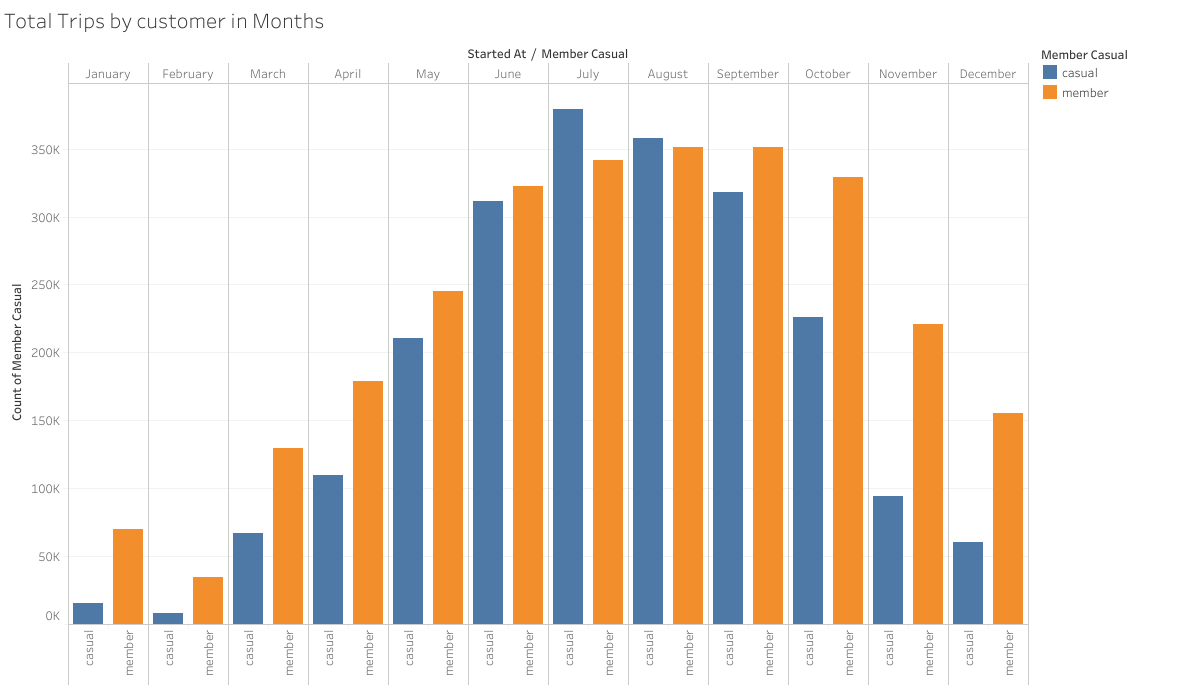

In [25]:
#Total Trips by customer in Months
image4 = Image.open('../input/cyclist-plots-made-by-tableau/Total Trips by customer in Months.png')
display(image4)

This graph shows that casual riders are more active in July to August which is 6% more than member riders. Other than that, casual riders rarely rent during winter (Jan to Feb and Nov to Dec).

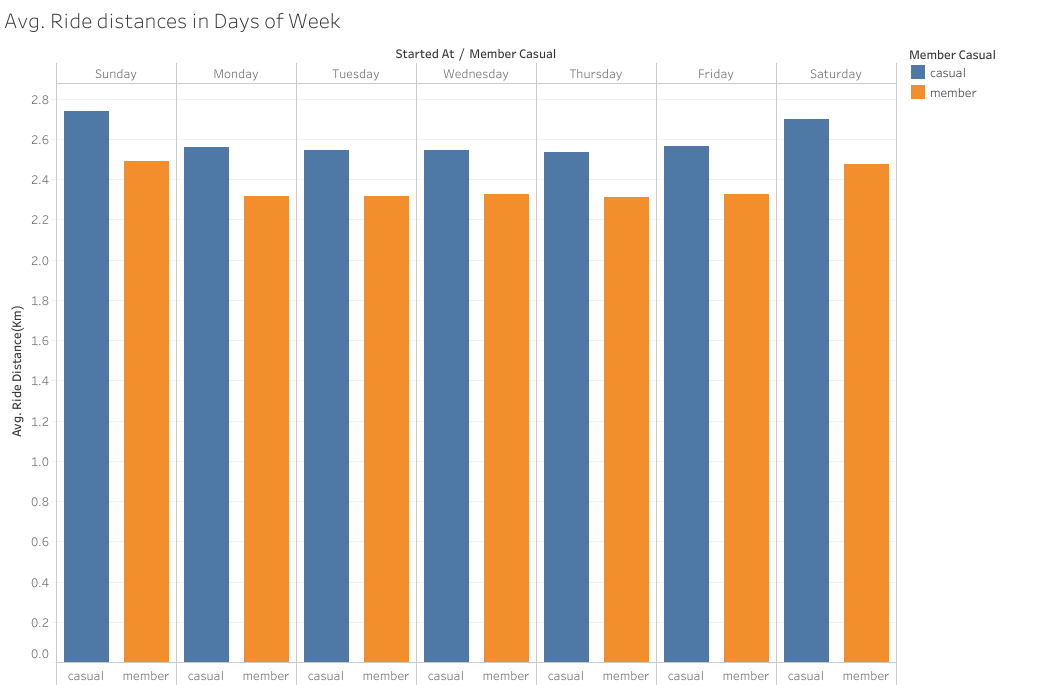

In [26]:
#Average ride distance by Customers in days of week
image5 = Image.open('../input/cyclist-plots-made-by-tableau/Avg. Ride distances in Days of Week.png')
display(image5)

This graph shows that casual riders rode further every day of week which is 10% more. Casual riders usually rode 2.6 km in average, and member riders rode 2.37 km every day.

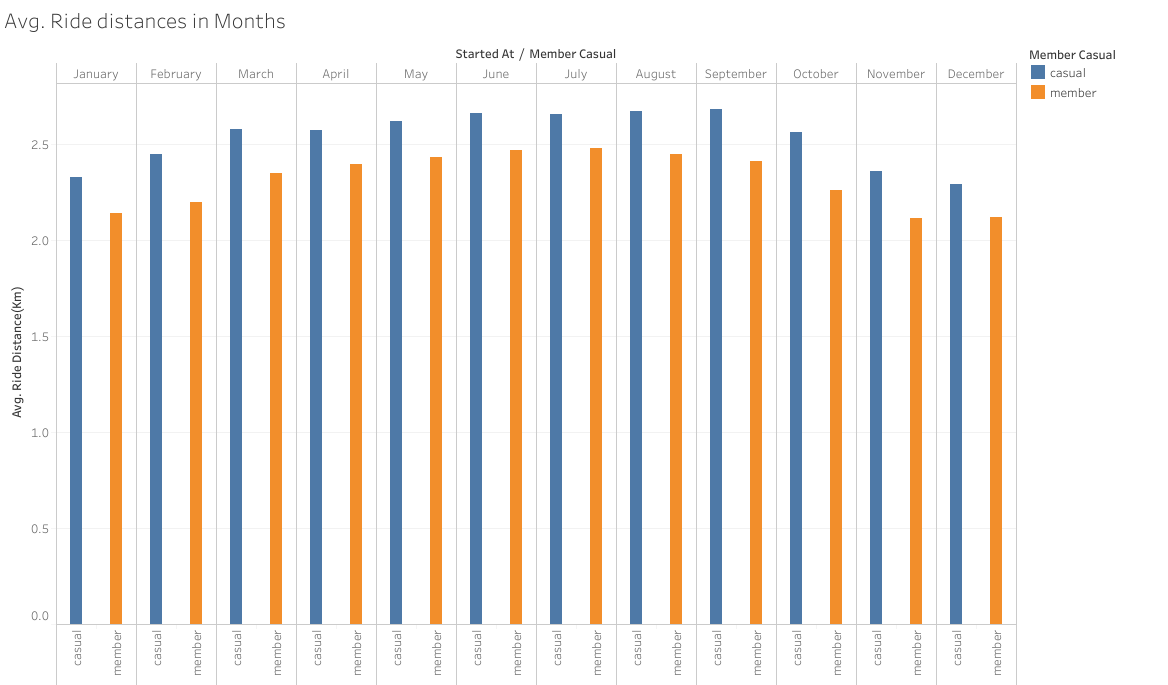

In [27]:
#Average ride distance by Customers in Months
image6 = Image.open('../input/cyclist-plots-made-by-tableau/Avg. Ride distances in Months.png')
display(image6)

This graph shows that casual riders rode further every month

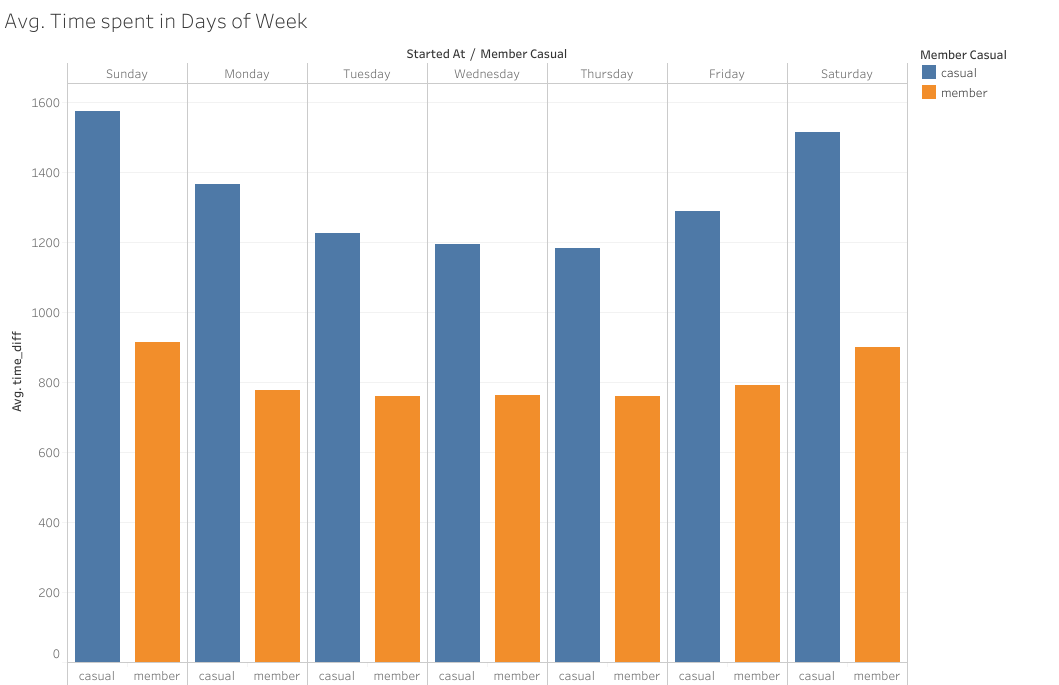

In [28]:
##Average time spent by Customers in days of week
image7 = Image.open('../input/cyclist-plots-made-by-tableau/Avg. Time spent in Days of Week.png')
display(image7)

This graph shows casual riders spent more time on riding every day of week which is 65% more. Casual riders usually spent 22 minutes in average, and member riders spent 13 minutes every day.

## **Takeaways**

* Annual members are 26% more than casual riders.
* Casual riders rent 10% more than annual members in weekends.
* Casual riders rent 6% more than annual members in July to August(Summer) and they rarely rent bikes in January to February (Winter).
* Annual mamber rode 2.3 km in average every day, and casual riders rode 2.6 km in average which is 10% further.
* Annual mamber spent 13 minutes in average every day, and casual riders spent 22 minutes in average which is 65% more in total.

## **Recommendations**

* Offer weekends discount for annual membership.
* Offer summer discount for annual membership.
* Offer special discount when annual members can ride more than 2.5 km each time.
* Get special discount or cupon for annual members who accumulate specific mileage. 